In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import operator
import xgboost as xgb
from collections import defaultdict
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
# removing features with only one unique value

def get_feats_with_unique(data):
    unique_counts = data.nunique(axis=0)
    feats_with_unique = unique_counts[unique_counts==1].index
    return feats_with_unique

train_unique_feats = get_feats_with_unique(train)
train.drop(columns=train_unique_feats, inplace=True)

test.drop(columns=train_unique_feats, inplace=True)

# 1. Transforming features

In [8]:
# 1. Limiting the test values to max-min from train
train_describe = train.describe()
test_describe = test.describe()
for c in train.columns:
    if c == 'TARGET':
        continue

    min_cut = train_describe[c]['min']
    max_cut = train_describe[c]['max']
    
    if test_describe[c]['min'] < min_cut:
        test.loc[test[c] < min_cut, c] = min_cut
        
    if test_describe[c]['max'] > max_cut:
        test.loc[test[c] > max_cut, c] = max_cut


# 2. Feature Importances

In [10]:
train_x = train.drop(['TARGET'], axis=1)
train_y = train['TARGET']

In [12]:
model = xgb.XGBClassifier(learning_rate=0.02, subsample=0.7, colsample_bytree=0.6)
bst_model = model.fit(train_x, train_y)

feat_importances2 = pd.DataFrame([train_x.columns, 
                                  bst_model.feature_importances_]).T.sort_values([1], ascending=False)


delete_features_xgb = feat_importances2[feat_importances2[1]<0.001][0].values

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_y, bst_model.predict_proba(train_x)[:, 1])

0.8281640264832596

In [17]:
selected_feats_model = feat_importances2[feat_importances2[1]>0][0].values

In [18]:
train_x_sub = train_x[selected_feats_model].copy()

In [20]:
len(selected_feats_model)

55

In [19]:
train_x_sub.corr()

,num_var35,ind_var30,num_var30,num_var4,saldo_var30,num_meses_var5_ult3,var15,num_var13,saldo_medio_var5_hace2,var38,...,num_op_var41_efect_ult1,imp_op_var41_comer_ult3,imp_sal_var16_ult1,num_var22_hace2,imp_op_var41_comer_ult1,num_var45_hace2,num_var45_ult3,num_sal_var16_ult1,imp_ent_var16_ult1,imp_var43_emit_ult1
num_var35,1.000000,0.667726,0.731010,0.983125,0.173771,0.534185,0.210186,0.213664,0.100495,-0.016814,...,0.383691,0.394575,0.014159,0.341903,0.394139,0.438951,0.472474,0.041164,0.062963,0.059804
ind_var30,0.667726,1.000000,0.875812,0.690123,0.131078,0.869045,0.032170,0.135343,0.075988,-0.036302,...,0.122502,0.109886,0.006959,0.176918,0.115939,0.181154,0.194852,0.016344,0.031632,0.032473
num_var30,0.731010,0.875812,1.000000,0.733809,0.327773,0.756298,0.158415,0.414008,0.144462,-0.023703,...,0.106633,0.102775,0.005709,0.251124,0.109123,0.242764,0.260748,0.015215,0.052233,0.077482
num_var4,0.983125,0.690123,0.733809,1.000000,0.170753,0.552891,0.206579,0.195285,0.099111,-0.018709,...,0.390310,0.390143,0.014451,0.340820,0.391582,0.430752,0.464071,0.042021,0.061200,0.060851
saldo_var30,0.173771,0.131078,0.327773,0.170753,1.000000,0.023288,0.325300,0.452435,0.387112,0.028700,...,-0.024148,-0.015364,0.011015,0.187719,-0.012917,0.126013,0.136700,0.002888,0.039059,0.233441
num_meses_var5_ult3,0.534185,0.869045,0.756298,0.552891,0.023288,1.000000,-0.070733,0.030470,0.051169,-0.042137,...,0.057802,0.058000,0.005304,0.086145,0.053713,0.106607,0.118812,0.010687,0.017295,0.014146
var15,0.210186,0.032170,0.158415,0.206579,0.325300,-0.070733,1.000000,0.296705,0.181542,0.006497,...,0.068364,0.093354,0.013525,0.235669,0.088145,0.205384,0.228395,0.029061,0.043722,0.073668
num_var13,0.213664,0.135343,0.414008,0.195285,0.452435,0.030470,0.296705,1.000000,0.198802,0.016580,...,-0.028090,-0.025740,-0.002102,0.160146,-0.022974,0.113410,0.129462,-0.004993,0.035705,0.012369
saldo_medio_var5_hace2,0.100495,0.075988,0.144462,0.099111,0.387112,0.051169,0.181542,0.198802,1.000000,0.037936,...,0.009997,0.017129,0.102017,0.156668,0.016744,0.092742,0.075877,0.032534,0.007159,0.160551
var38,-0.016814,-0.036302,-0.023703,-0.018709,0.028700,-0.042137,0.006497,0.016580,0.037936,1.000000,...,0.000684,0.009477,0.003382,0.003261,0.008473,-0.001813,0.001298,0.007200,0.000007,0.002650


In [26]:
train_sub = pd.concat([train_x_sub, train_y], axis=1)

In [23]:
from sklearn.cluster.bicluster import SpectralCoclustering
spec_model = SpectralCoclustering(n_clusters=15, n_jobs=-1, random_state=10)

In [32]:
train_sub['var38'] = np.log(train_sub['var38'])

In [33]:
corr_data = train_sub.corr()
rows_ids = corr_data.index
corr_data_np = corr_data.to_numpy()
spec_model.fit(corr_data)
fit_data = corr_data_np[np.argsort(spec_model.row_labels_)]
fit_data = fit_data[:, np.argsort(spec_model.column_labels_)]
fit_data_df = pd.DataFrame(fit_data, index=rows_ids[np.argsort(spec_model.row_labels_)], columns=rows_ids[np.argsort(spec_model.row_labels_)])


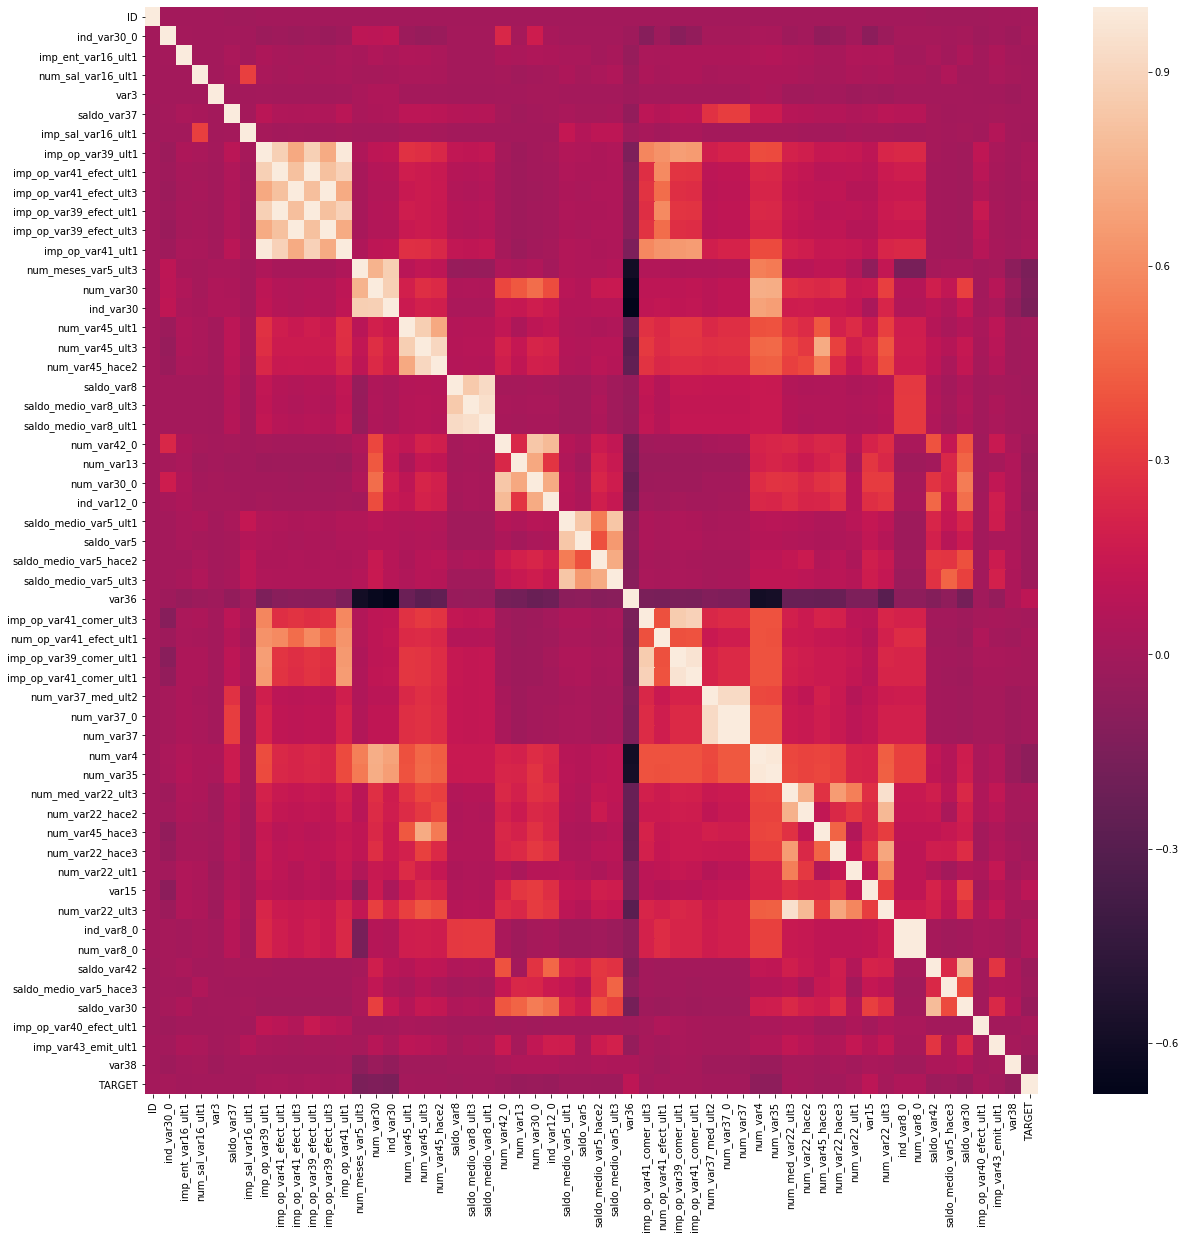

In [34]:
plt.figure(figsize=(20, 20))
ax = plt.gca()
sns.heatmap(fit_data_df, ax=ax)

In [52]:
correlated_features = ['imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var41_ult1']

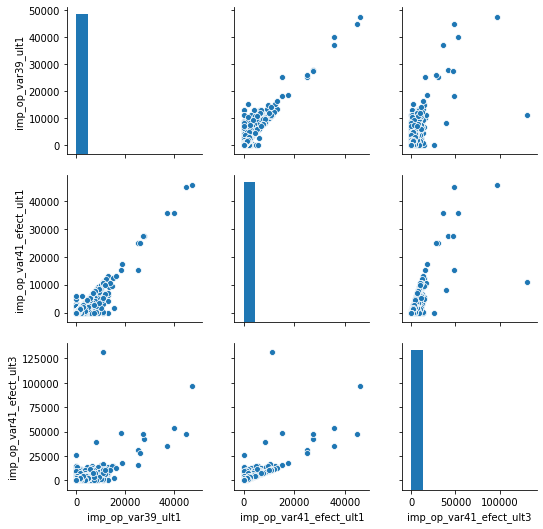

In [53]:
sns.pairplot(train_sub.loc[:, ['imp_op_var39_ult1', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3']])



In [55]:
train_sub['f_var39_41_1'] = train_sub['imp_op_var39_ult1'] - train_sub['imp_op_var41_efect_ult1']
train_sub['f_var39_41_2'] = ((train_sub['imp_op_var39_ult1'] - train_sub['imp_op_var41_efect_ult3'])/3)
train_sub['f_var41_41_1'] = ((-train_sub['imp_op_var41_efect_ult1'] + 2*train_sub['imp_op_var41_efect_ult3'])/30)




In [72]:
(train_sub['num_var30'] - train_sub['num_meses_var5_ult3']).value_counts()

 0     58698
 1      8037
 3      3942
 2      2860
 4       796
-2       452
-3       385
 6       321
 5       207
-1       184
 7        77
 9        29
 8        16
 12        6
 10        5
 13        1
 14        1
 15        1
 18        1
 33        1
dtype: int64

In [70]:
train_sub['f_var30_5_1'] = (train_sub['num_var30'] - train_sub['num_meses_var5_ult3'])

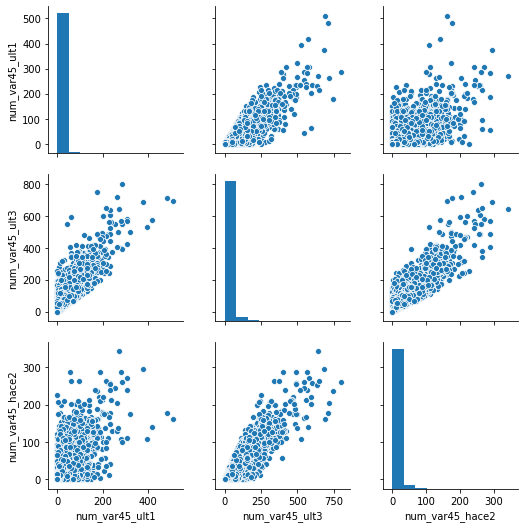

In [73]:
sns.pairplot(train_sub.loc[:, ['num_var45_ult1', 'num_var45_ult3', 'num_var45_hace2']])

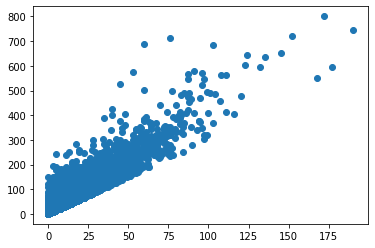

In [102]:
plt.scatter(((train_sub['num_var45_ult3'] - train_sub['num_var45_ult1'])/3), train_sub['num_var45_ult3'])

In [103]:
train_sub['f_var45_45_1'] = ((train_sub['num_var45_ult3'] - train_sub['num_var45_ult1'])/3)


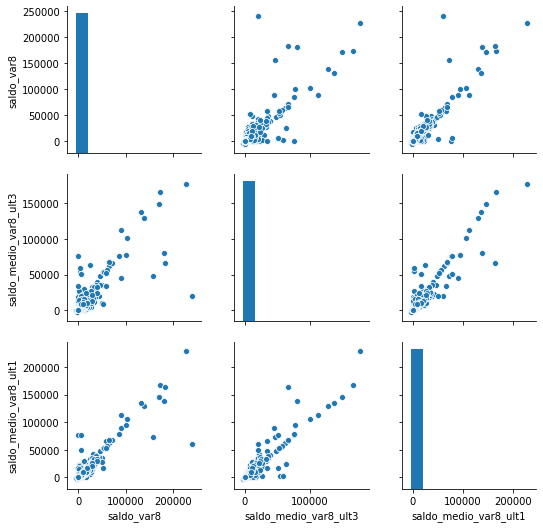

In [107]:
sns.pairplot(train_sub.loc[:, ['saldo_var8', 'saldo_medio_var8_ult3', 'saldo_medio_var8_ult1']])

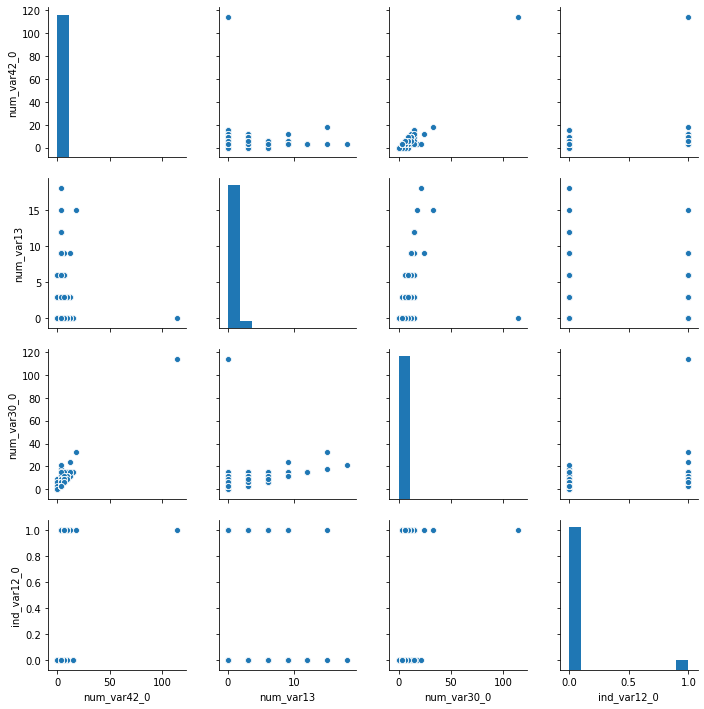

In [106]:
sns.pairplot(train_sub.loc[:, ['num_var42_0', 'num_var13', 'num_var30_0', 
                              'ind_var12_0']])

In [113]:
# (train_sub['num_var42_0']/3).value_counts(); 
((train_sub['num_var13'])/3).value_counts()

0.0    72154
1.0     3712
2.0      135
3.0       12
4.0        4
5.0        2
6.0        1
Name: num_var13, dtype: int64

In [115]:
((train_sub['num_var42_0'] - train_sub['num_var13'])/3).value_counts()

 1.0     69490
 2.0      3677
 0.0      2491
-1.0       173
 3.0       155
-2.0        20
 4.0         5
-3.0         4
 5.0         2
 38.0        1
-5.0         1
-4.0         1
dtype: int64

In [116]:
((train_sub['num_var30_0'] - train_sub['num_var42_0'])/3).value_counts()

0.0    72048
1.0     3740
2.0      200
3.0       22
4.0        7
5.0        2
6.0        1
dtype: int64

In [119]:
train_sub['f_var30_42_1'] = ((train_sub['num_var30_0'] - train_sub['num_var42_0'])/3)

In [123]:
((train_sub['num_var42_0'].apply(lambda x: str(x)) + "-" + train_sub["ind_var12_0"].apply(lambda x: str(x)))).value_counts()

3-0      69944
6-1       4629
6-0        497
0-0        436
3-1        298
9-1        195
12-1         9
9-0          8
15-0         2
18-1         1
114-1        1
dtype: int64

In [132]:
((train_sub['num_var30_0'] - train_sub['num_var13'])/3).value_counts()

1.0     70168
2.0      5110
0.0       433
3.0       270
4.0        34
5.0         3
6.0         1
38.0        1
dtype: int64

In [129]:
train_sub['num_var13'].value_counts()

0     72154
3      3712
6       135
9        12
12        4
15        2
18        1
Name: num_var13, dtype: int64

In [133]:
train_sub['f_var30_13_1'] = ((train_sub['num_var30_0'] - train_sub['num_var13'])/3)

In [142]:
new_feats = list(set(train_sub.columns) - set(train.columns))

In [144]:
train_new = pd.concat([train, train_sub[new_feats]], axis=1)

In [145]:
train_x_sub2 = train_new.drop(['TARGET'], axis=1)

In [148]:
model = xgb.XGBClassifier(learning_rate=0.02, subsample=0.7, colsample_bytree=0.6, n_estimators=130)
bst_model = model.fit(train_x_sub2, train_y)

feat_importances2 = pd.DataFrame([train_x_sub2.columns, 
                                  bst_model.feature_importances_]).T.sort_values([1], ascending=False)


delete_features_xgb = feat_importances2[feat_importances2[1]<0.001][0].values

In [136]:
roc_auc_score(train_y, bst_model.predict_proba(train_x_sub2)[:, 1])

0.7285106322874935

In [139]:
roc_auc_score(train_y, bst_model.predict_proba(train_x_sub2)[:, 1])

0.8305367624463655

In [149]:
roc_auc_score(train_y, bst_model.predict_proba(train_x_sub2)[:, 1])

0.8311151020533203